In [1099]:
import numpy as np # linear algebra, data manipulation
import pandas as pd # data processing, # Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# change to  dates and time default formats
from datetime import datetime
import time

In [1100]:
train_data= pd.read_csv('C:\\Users\\HP\\Desktop\\train_users_2.csv')


In [1101]:
train_data.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013083e+13,49.668335,3.267387
std,9.253690e+09,155.666612,7.637707
min,2.009030e+13,1.000000,0.000000
25%,2.012120e+13,28.000000,0.000000
50%,2.013090e+13,34.000000,0.000000
75%,2.014030e+13,43.000000,0.000000
max,2.014060e+13,2014.000000,25.000000


In [1102]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,6/28/2010,2.009030e+13,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,5/25/2011,2.009050e+13,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,9/28/2010,2.009060e+13,8/2/2010,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,12/5/2011,2.009100e+13,9/8/2012,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,9/14/2010,2.009120e+13,2/18/2010,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [1103]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  float64
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [1104]:
# Converting to date time format
train_data['date_account_created'] = pd.to_datetime((train_data['date_account_created']))
train_data['date_first_booking'] = pd.to_datetime(train_data['date_first_booking'])
train_data['timestamp_first_active'] = pd.to_datetime(train_data['timestamp_first_active'])

In [1105]:

print('Date first booking null value percentage : ',(train_data['date_first_booking'].isnull().sum()/len(train_data['date_first_booking'].isnull())*100),'%\n')
print('Age null value percentage : ',(train_data['age'].isnull().sum()/len(train_data['age'].isnull())*100),'%\n')
print('first_affiliate_tracked null value percentage : ',(train_data['first_affiliate_tracked'].isnull().sum()/(train_data['first_affiliate_tracked'].isnull())*100),'%\n')

Date first booking null value percentage :  58.34734904029496 %

Age null value percentage :  41.222575673105304 %

first_affiliate_tracked null value percentage :  0         inf
1         inf
2         inf
3         inf
4         inf
         ... 
213446    inf
213447    inf
213448    inf
213449    inf
213450    inf
Name: first_affiliate_tracked, Length: 213451, dtype: float64 %



In [1106]:
train_data.loc[(train_data.age > 95) | (train_data.age < 15), 'age'] = np.nan
train_data['age']= train_data['age'].fillna(train_data['age'].median())
#I choose to fill with median because it's robust with outliers
train_data.age.isnull().sum()#checking for null values after filling

0

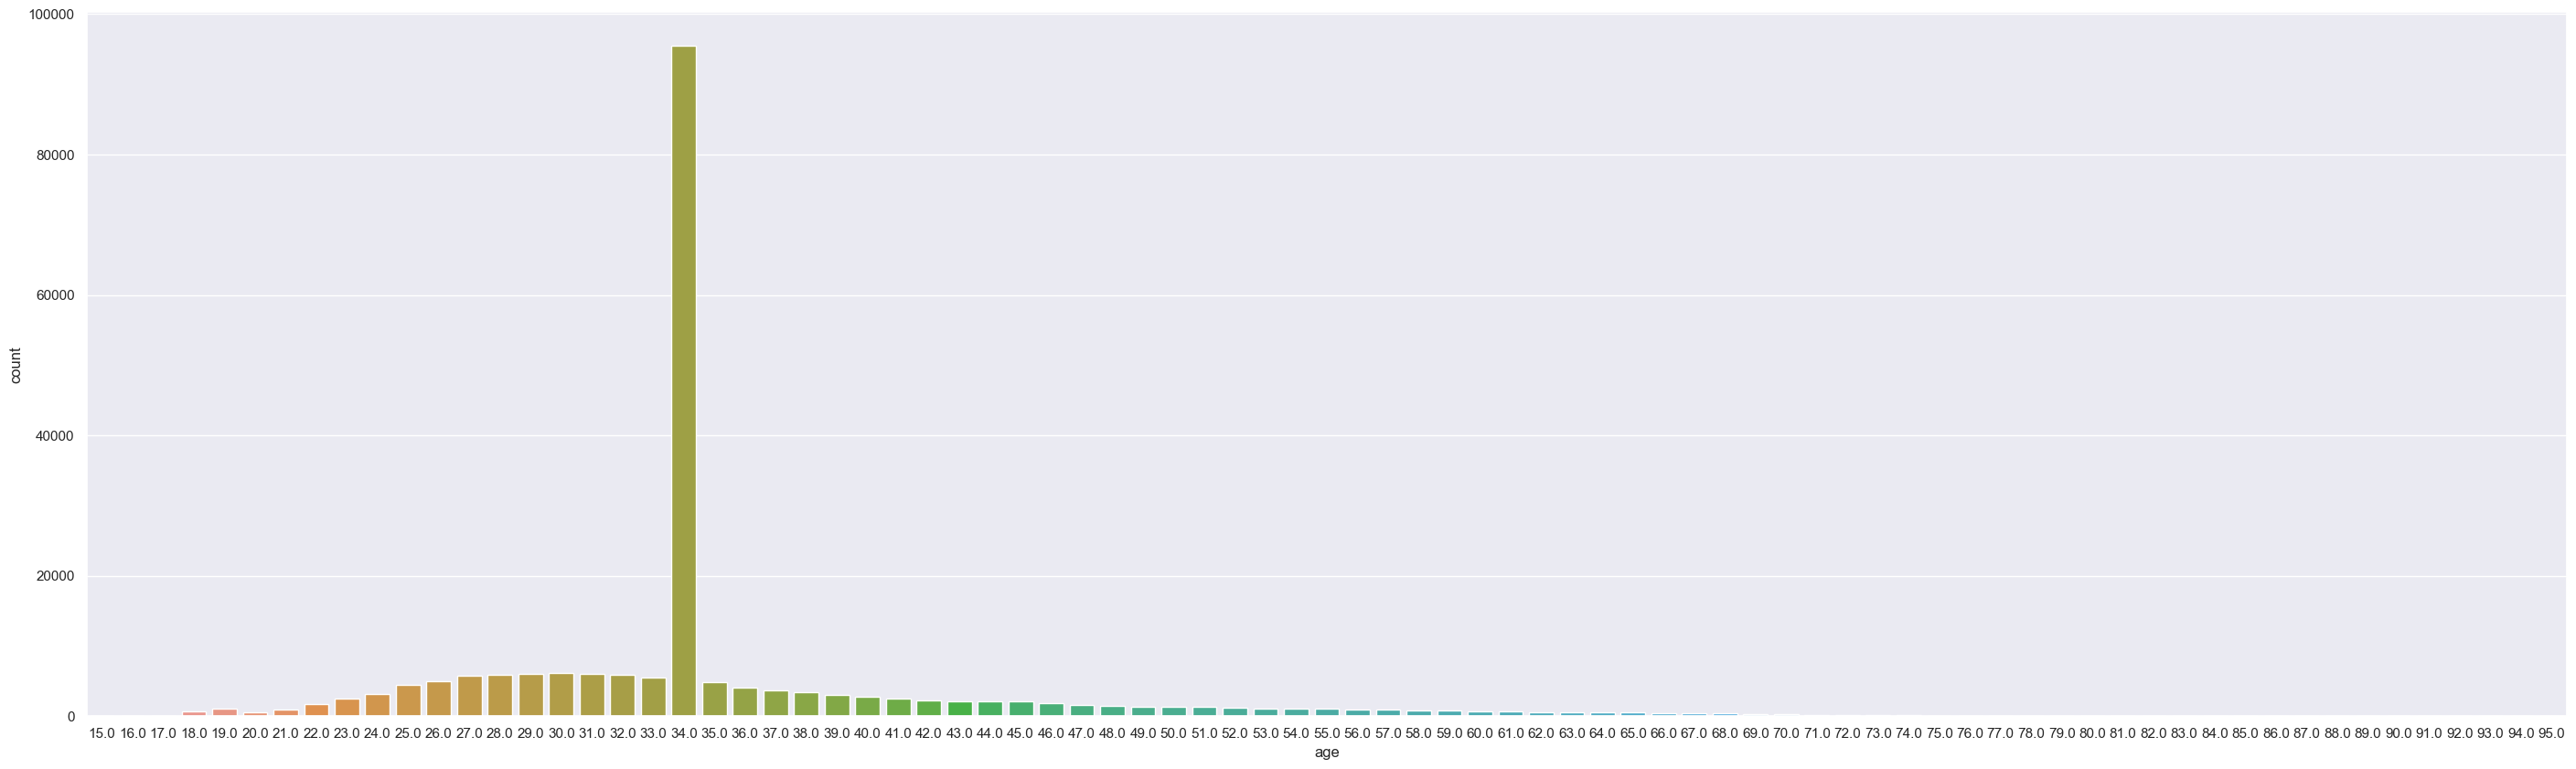

In [1107]:
plt.figure(figsize=(35,10))
sns.countplot(x='age',data=train_data)#outliers are sucessfully removed
plt.show()

In [1108]:
train_data.dropna(inplace=True) #The dropna () method removes the rows that contains NULL values

In [1109]:
train_data=train_data.drop_duplicates() #used to remove duplicate values
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.600,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.000,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.200,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,1970-01-01 05:35:00.100,2010-01-02,-unknown-,34.0,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,1970-01-01 05:35:00.100,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


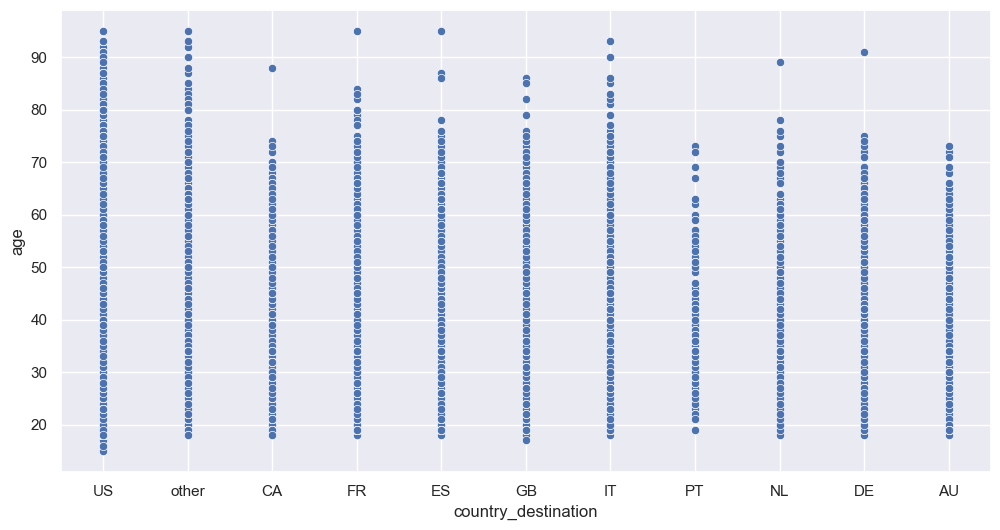

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87170 entries, 2 to 213445
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       87170 non-null  object        
 1   date_account_created     87170 non-null  datetime64[ns]
 2   timestamp_first_active   87170 non-null  datetime64[ns]
 3   date_first_booking       87170 non-null  datetime64[ns]
 4   gender                   87170 non-null  object        
 5   age                      87170 non-null  float64       
 6   signup_method            87170 non-null  object        
 7   signup_flow              87170 non-null  int64         
 8   language                 87170 non-null  object        
 9   affiliate_channel        87170 non-null  object        
 10  affiliate_provider       87170 non-null  object        
 11  first_affiliate_tracked  87170 non-null  object        
 12  signup_app               87170 

In [1110]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='country_destination',y='age',data=train_data)
plt.show()
train_data.info()

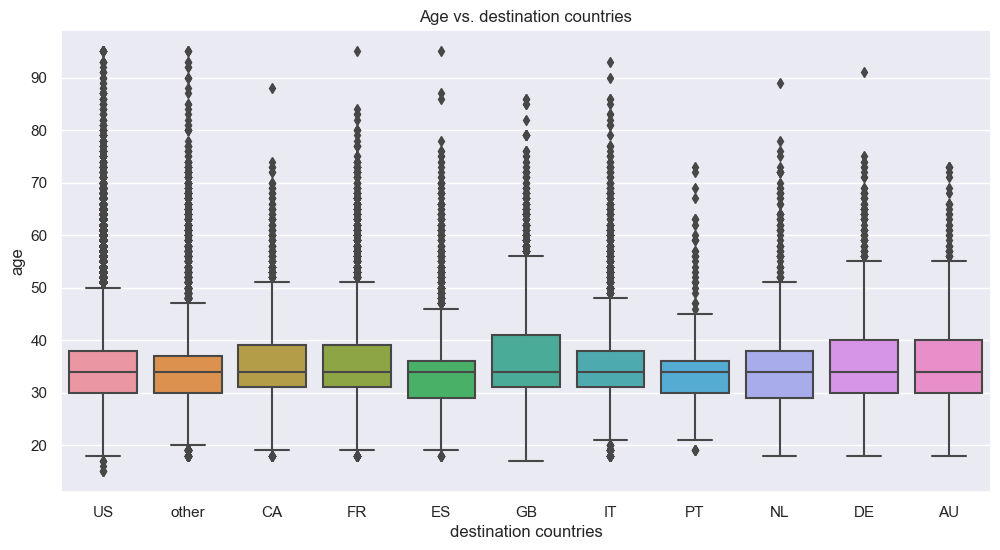

In [1111]:
plt.figure(figsize=(12,6))
sns.boxplot(x='country_destination',y='age', data=train_data)
plt.xlabel('destination countries')
plt.title('Age vs. destination countries')
plt.show()

<AxesSubplot: ylabel='id'>

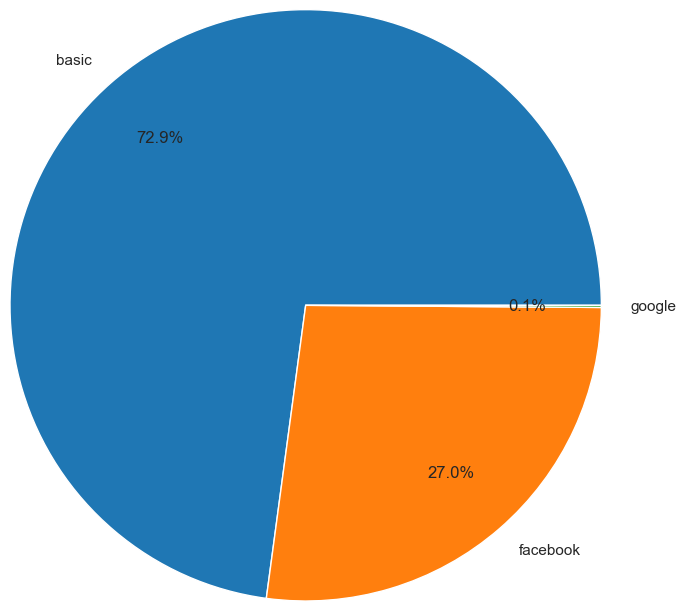

In [1112]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 
train_data.groupby([train_data.signup_method]).count().id.plot(kind='pie',colors=colors,radius = 2, shadow=False, autopct='%.1f%%', pctdistance=0.75)


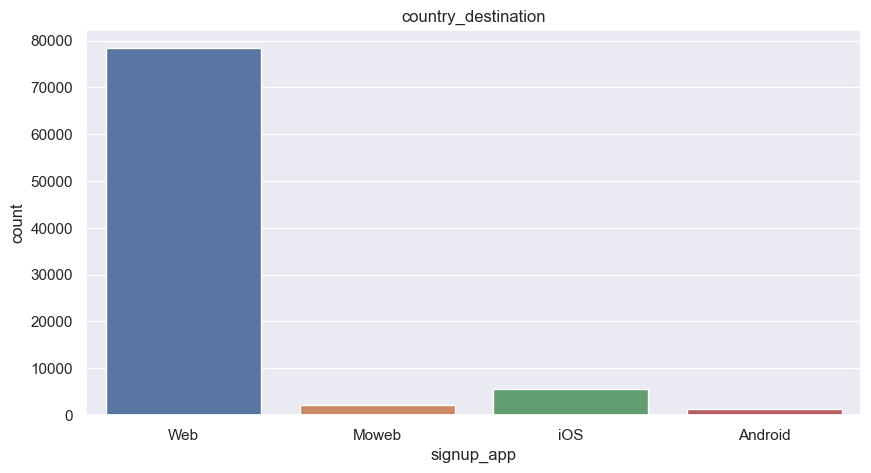

In [1113]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="signup_app", data=train_data)
plt.title("country_destination")
plt.show()


<AxesSubplot: >

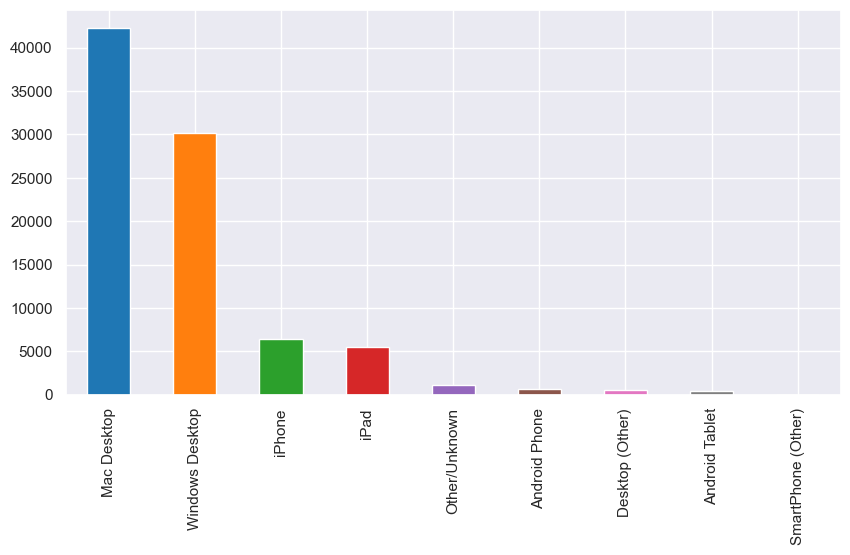

In [1114]:
plt.figure(figsize = (10,5))
train_data.first_device_type.value_counts(dropna=False).plot(kind='bar', color=colors)

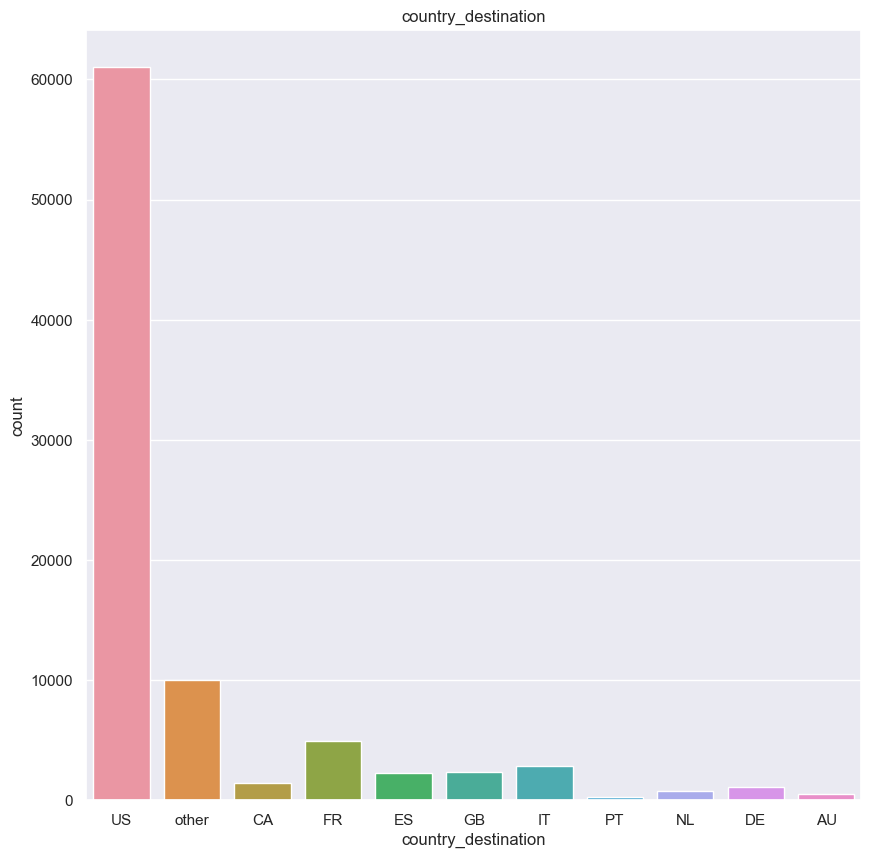

In [1115]:
# destination country share
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="country_destination", data=train_data)
plt.title("country_destination")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13836\739032684.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=train_data.corr()


<AxesSubplot: >

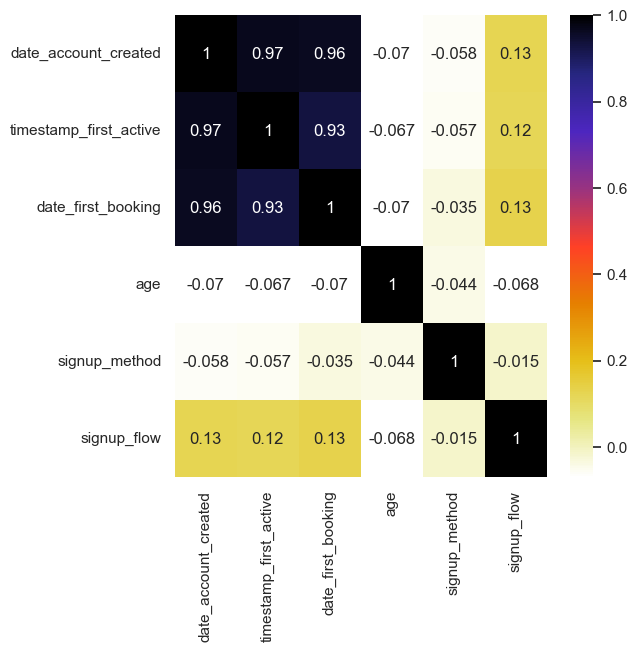

In [1137]:
cor=train_data.corr()
plt.figure(figsize=(6,6))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

    Using Random Forest Classifier

In [1117]:
g=train_data.groupby('date_account_created').agg('count')['country_destination']
g

date_account_created
2010-01-01      1
2010-01-02      1
2010-01-03      1
2010-01-04      3
2010-01-07      1
             ... 
2014-06-26    194
2014-06-27    192
2014-06-28    165
2014-06-29    162
2014-06-30    223
Name: country_destination, Length: 1611, dtype: int64

<AxesSubplot: xlabel='date'>

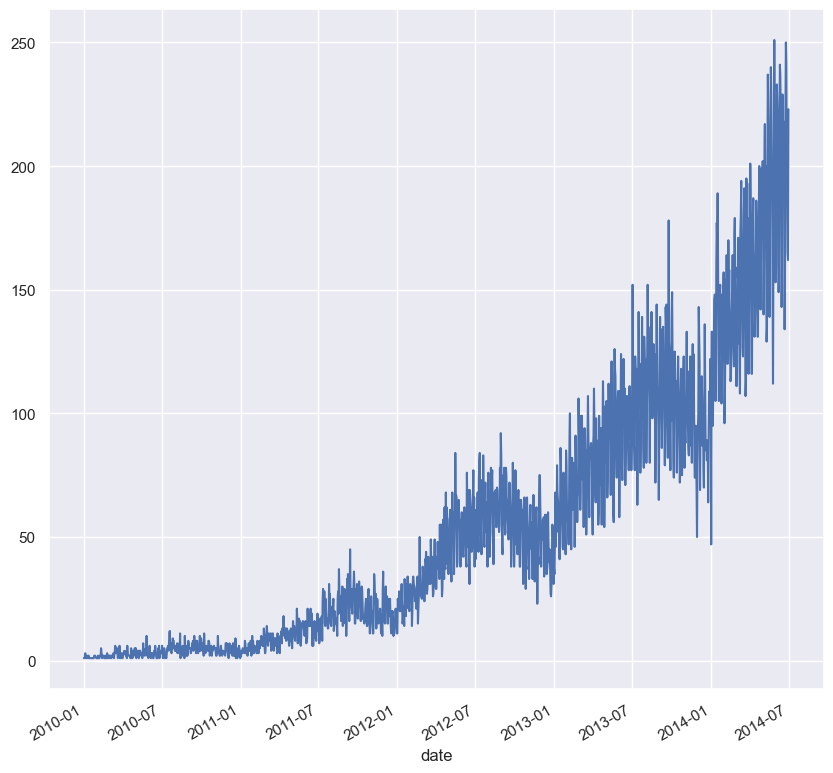

In [1118]:

gf = pd.DataFrame(g)
gf.reset_index(inplace=True)
gf = gf.rename(columns={'date_account_created': 'date', 'country_destination': 'Passengers'})
ec_gf= gf.set_index('date')
ec_data = ec_gf['Passengers']
plt.figure(figsize=(10,10)) 
ec_data.plot(grid=True)

In [1119]:
ec_gf = ec_gf.asfreq('MS')
ec_gf = ec_gf.sort_index()
ec_gf.head()

,Passengers
date,
2010-01-01,1.0
2010-02-01,NaN
2010-03-01,2.0
2010-04-01,1.0
2010-05-01,2.0


In [1120]:
ec_gf['Passengers'].interpolate(method='linear', inplace=True)
(ec_gf.index == pd.date_range(start=ec_gf.index.min(),
                             end=ec_gf.index.max(),
                             freq=ec_gf.index.freq)).all()

True

In [1121]:
steps = 36
data_train = ec_gf[:-steps]
data_test  = ec_gf[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")


Train dates : 2010-01-01 00:00:00 --- 2011-06-01 00:00:00  (n=18)
Test dates  : 2011-07-01 00:00:00 --- 2014-06-01 00:00:00  (n=36)


In [1122]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 5
                )

forecaster.fit(y=data_train['Passengers'])


In [1123]:
steps = 36
predictions = forecaster.predict(steps=steps)

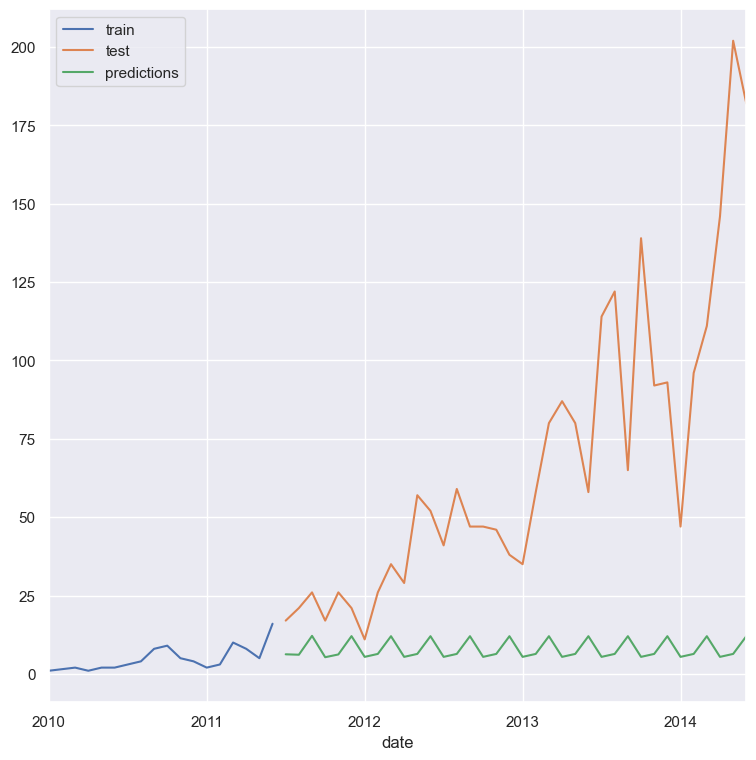

In [1124]:
fig, ax = plt.subplots(figsize=(9, 9))
data_train['Passengers'].plot(ax=ax, label='train')
data_test['Passengers'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend()

In [1125]:

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

train_data.loc[train_data.gender=='MALE', 'gender'] = 0
train_data.loc[train_data.gender=='FEMALE', 'gender'] = 1
train_data.loc[train_data.gender=='-unknown-', 'gender'] = 2
train_data.loc[train_data.gender=='OTHER', 'gender'] = 3
train_data['date_account_created'] = train_data['date_account_created'].apply(pd.Timestamp.timestamp)
train_data['date_first_booking'] = train_data['date_first_booking'].apply(pd.Timestamp.timestamp)
train_data['timestamp_first_active'] = train_data['timestamp_first_active'].apply(pd.Timestamp.timestamp)
train_data['signup_method'].replace(['basic','facebook','google'],[0, 1,2], inplace=True)
feature_cols=['gender','age','date_account_created','signup_flow']

x=train_data[feature_cols]
y=train_data.country_destination

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [1126]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1127]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

    Using RandomForecast Classifier

In [1128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.5639937287293029


Using Decision Tree classifier


In [1129]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [1130]:
predicate = pd.DataFrame(y_pred)     
predicate

,0
0,US
1,US
2,US
3,FR
4,US
...,...
26146,NL
26147,US
26148,US
26149,US


In [1131]:
#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.540705900347979


Using KNN Classifier

In [1132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model=KNeighborsClassifier(n_neighbors=17)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [1133]:
# Accuracy on Tesing Data
y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6991319643608275


In [1134]:
predicate = pd.DataFrame(y_pred)     
predicate

,0
0,US
1,US
2,US
3,US
4,US
...,...
26146,US
26147,US
26148,US
26149,US


Using Naive Bayes

In [1135]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,y_train)
y_pred_NB = clf.predict(X_test)
Acc=NB.score(X_test, y_pred)
print(Acc)

0.9990440136132461


In [1136]:
predicate = pd.DataFrame(y_pred_NB)     
predicate

,0
0,IT
1,US
2,other
3,FR
4,US
...,...
26146,US
26147,other
26148,US
26149,US
